In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit #simpliest scipy fitting method
from scipy.stats.distributions import chi2
import scipy.special as sf # needed for p-value calculation
import scipy.stats as stats

%matplotlib inline

# Hunt Ectended Formula:
 $$A\exp(-Ct/\lambda^4)\exp(-Bt/\lambda^8)$$

* $A$ is the clarity 
* $B$ is related to the amount of absorption
* $C$ is related to the amount of scattering
* $t$ is the thickness of the tile

### Define a function called HuntExtendFrom that takes as argurment: $\lambda$, $A$, $Bt$, $Ct$, and returns the evaluation of:
### $$A\cdot\exp(-Ct/(\lambda)^4)\exp(-Bt/(\lambda)^8)$$

This function has 3 fit paramters $A$, $Ct$, $Bt$, where $Ct$ and $Bt$ have units of $\mu m$

In [8]:
#define the HuntExtendForm function
import numpy as np

def HuntExtendFrom(lam, A, Bt, Ct):
    """
    lam : wavelength
    A : clarity 
    Bt : absorption*thickness 
    Ct : scattering*thickness 
    """
    return A * np.exp(-Ct / (lam ** 4)) * np.exp(-Bt / (lam ** 8))

# Below are the measurement results

In [9]:
W = np.array([340.45,432.42,520.45,633.77]) #[nm]
W = W*0.001 #convert from nm to um
T = np.array([36.05,69.14,83.91,92.26]) #transmittance results [%]
dT = 0.001*T #error on the transmittance results [%]

# Fit the data
To fit the data we will use the curve_fit function from the SciPy library:
### curve_fit(HuntExtendForm, W, T, p0, sigma=dT, absolute_sigma=True)
Here we use an additional paramter **p0**, which is an array that contains values that the curve_fit function should use as a starting point when optimizing the fit parameters. For our purposes we will start with $A = 1$, $Bt = 0$, and $Ct = 0$.

### Define an initial parameter array p0 = [1,0,0]. Then fit the data and calculate the $\chi^2,\;dof,\;\chi^2/dof$, and the p-value:


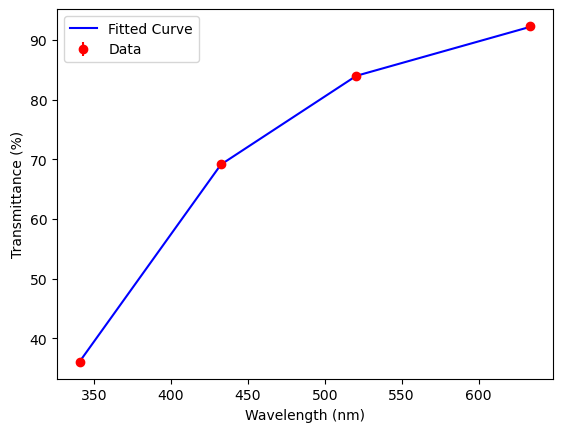

In [20]:
p0 = [1, 0, 0]  #A, Bt, Ct

#Fit the data
popt, pcov = curve_fit(HuntExtendFrom, W, T, p0=p0, sigma=dT, absolute_sigma=True)
A_fit, Bt_fit, Ct_fit = popt

#Calculate chi2, dof, chi2/dof, and p-value 
residuals = T - HuntExtendFrom(W, *popt)
chi_sq = np.sum((residuals / dT) ** 2)
dof = len(T) - len(popt)
chi2_dof = chi_sq / dof if dof > 0 else np.nan
p_value = 1 - stats.chi2.cdf(chi_sq, dof)

#plot the data and fit result on the same graph vs wavelength
T_fit = HuntExtendFrom(W, *popt)

plt.figure()
plt.errorbar(W * 1000, T, yerr=dT, fmt='o', label='Data', color='red')  # Convert W back to nm for the plot
plt.plot(W * 1000, T_fit, label='Fitted Curve', color='blue')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmittance (%)')
plt.legend()
plt.show()


### Using your $Ct$ fit result we will look at the scattering length vs. wavelength
1. Define an array that spans from 200nm to 900nm and contains 700 points
2. We need to make sure that our units between $\lambda$ and $Ct$ are consistant, so make your wavelength array contain wavelengths in $\mu m$. E.G. $$ 0.001\cdot \lambda[nm] = \lambda[\mu m]$$
3. Now define a scattering length array, where the scattering length is defined as: $$\Lambda_{scatter} = \lambda/Ct/t,$$ where $t = 2.51 cm$, and is the tile thickness. This will give the $\Lambda_{scatter}$ in units of $cm$
4. Plot the scattering length vs. wavelength. When plotting us a log scale for the y-axis via. **axes.set_yscale('log')**

In [ ]:
#create the new wavelegth and scattering length arrays
t = 2.51 #[cm]


#plot the scattering length vs. wavelength


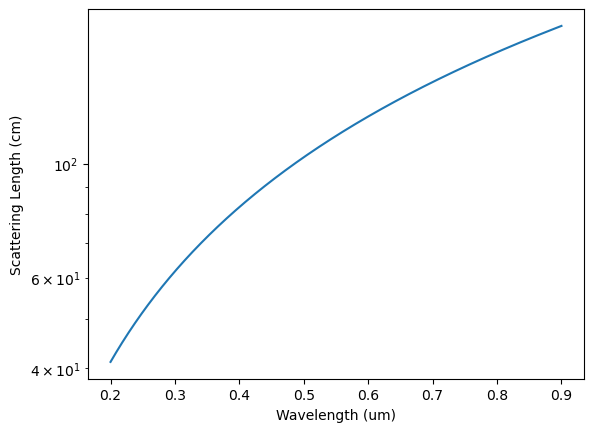

In [24]:
#define array
lam_nm = np.linspace(200, 900, 700)

#convert to micrometers
lam_um = 0.001 * lam_nm

#scattering length
t = 2.51 
lam_scatter = (lam_um*t)/Ct_fit  

#plot
plt.figure()
plt.plot(lam_um, lam_scatter)

plt.xlabel('Wavelength (um)')
plt.ylabel('Scattering Length (cm)')
plt.yscale('log')
plt.show()